In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Handling in PyG

### Data

Let's create a dummy graph

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
embeddings

tensor([[0.8580, 0.6888, 0.3512,  ..., 0.6089, 0.1169, 0.9320],
        [0.4469, 0.8002, 0.2561,  ..., 0.4210, 0.5137, 0.6263],
        [0.9191, 0.6763, 0.5628,  ..., 0.7713, 0.7483, 0.7404],
        ...,
        [0.3225, 0.8209, 0.4928,  ..., 0.4074, 0.6047, 0.0074],
        [0.1501, 0.7866, 0.2152,  ..., 0.0160, 0.5709, 0.6297],
        [0.6698, 0.2458, 0.9367,  ..., 0.7606, 0.8439, 0.5683]])

In [4]:
embeddings.shape

torch.Size([100, 16])

In [5]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

/tmp/ipykernel_7838/2043223261.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  edges = torch.tensor([rows, cols])


In [7]:
rows

array([85, 29, 60, 44, 58, 83, 98, 81,  0, 71, 62, 92, 27, 27, 18, 73, 58,
        0, 67,  9, 69, 30, 27, 80, 74, 91,  1,  4, 89,  8, 90,  0, 77, 24,
       41, 91,  3, 12,  8, 22, 49, 63, 26, 80, 13, 12, 52, 28, 74, 27, 76,
       83,  5, 79, 83, 10, 58, 15, 63, 47, 95, 13, 34, 43, 26,  6, 36, 60,
       35, 32, 54, 22, 25, 62, 88, 64, 75, 94,  8, 42, 94, 29, 78,  3, 16,
       96, 32,  2, 94, 73, 50, 37, 75, 30, 40, 60,  0, 32, 47, 65, 81, 25,
       61, 31, 36, 82, 92,  0, 12, 28, 48, 49, 38, 62, 49, 79, 15, 97, 17,
       72, 58, 97, 51, 20,  6, 80, 89, 56, 94, 57, 46, 26, 74, 65,  3, 80,
       75, 90, 94,  1, 44,  7, 73, 60,  3, 30, 92, 89, 94, 98, 96,  6, 30,
       39, 44, 18, 76, 20, 35, 16, 69, 81, 36, 13, 65, 41, 77, 11, 82, 30,
       44, 68, 34, 11, 33, 88, 38, 93, 35, 36,  9, 50, 40, 35, 80, 95, 84,
       61, 46, 32, 49, 67, 94, 36, 61, 45, 27, 78, 95, 60, 29, 93, 46, 46,
       45, 17, 67, 43, 73, 90, 79, 51, 85, 71, 71, 22, 47, 47, 29, 54, 71,
       18, 73, 11, 30, 76

In [8]:
cols

array([52, 84, 64, 80, 76, 69, 75, 31, 25, 92, 81, 70, 45, 88, 76, 19, 29,
       75, 61, 26, 32, 36, 17, 52, 44, 72, 77, 55, 81,  5, 95, 34, 53, 80,
        5, 66, 64, 59, 68, 98,  0, 95, 58, 22, 91, 83, 92, 16, 97,  3, 78,
       56, 11, 20, 68, 63, 28, 32, 65, 78, 51, 31, 25,  3, 30, 58, 49, 33,
       99, 71, 93, 82, 74,  7, 32, 65, 78, 50, 16, 98, 25, 38, 17, 96, 25,
       23, 40, 41,  3, 14,  7, 63, 36,  7, 19, 86, 66, 74, 77, 62, 63, 79,
       24,  5, 14, 32, 15, 72,  0,  1, 79, 36, 89, 23,  1,  7, 61, 80, 40,
       14, 24, 87, 43, 63, 40, 60, 55,  4, 43, 51, 93, 53, 90, 70, 99, 66,
       21, 42,  7, 30, 97, 61, 27, 45, 50, 23, 74, 18, 54, 36, 12, 67, 23,
       64, 29, 95, 51, 93, 41, 33, 18, 94, 13, 93, 73, 84, 55, 23, 50, 68,
       77, 47, 52, 51, 88, 45, 11, 80, 48, 25, 32, 27, 26, 60, 92, 91, 13,
       21, 85, 56, 81, 46, 82, 23, 89, 96, 14, 43, 87, 30, 80, 96, 84, 14,
       94, 42, 20, 50, 48, 49, 24, 13, 84, 96, 29,  5, 18, 86, 99, 49,  6,
       62, 42, 19, 63,  3

In [6]:
edges_attr = np.random.choice(3,500)

In [11]:
edges_attr

array([0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2,
       2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2,

In [9]:
ys = torch.rand((100)).round().long()

In [10]:
ys

tensor([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0])

Convert the graph information into a PyG Data object

In [12]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [13]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

Let's visualize the information contained in the data object

In [14]:
for prop in graph:
    print(prop)

('x', tensor([[0.8580, 0.6888, 0.3512,  ..., 0.6089, 0.1169, 0.9320],
        [0.4469, 0.8002, 0.2561,  ..., 0.4210, 0.5137, 0.6263],
        [0.9191, 0.6763, 0.5628,  ..., 0.7713, 0.7483, 0.7404],
        ...,
        [0.3225, 0.8209, 0.4928,  ..., 0.4074, 0.6047, 0.0074],
        [0.1501, 0.7866, 0.2152,  ..., 0.0160, 0.5709, 0.6297],
        [0.6698, 0.2458, 0.9367,  ..., 0.7606, 0.8439, 0.5683]]))
('edge_index', tensor([[85, 29, 60, 44, 58, 83, 98, 81,  0, 71, 62, 92, 27, 27, 18, 73, 58,  0,
         67,  9, 69, 30, 27, 80, 74, 91,  1,  4, 89,  8, 90,  0, 77, 24, 41, 91,
          3, 12,  8, 22, 49, 63, 26, 80, 13, 12, 52, 28, 74, 27, 76, 83,  5, 79,
         83, 10, 58, 15, 63, 47, 95, 13, 34, 43, 26,  6, 36, 60, 35, 32, 54, 22,
         25, 62, 88, 64, 75, 94,  8, 42, 94, 29, 78,  3, 16, 96, 32,  2, 94, 73,
         50, 37, 75, 30, 40, 60,  0, 32, 47, 65, 81, 25, 61, 31, 36, 82, 92,  0,
         12, 28, 48, 49, 38, 62, 49, 79, 15, 97, 17, 72, 58, 97, 51, 20,  6, 80,
         89, 

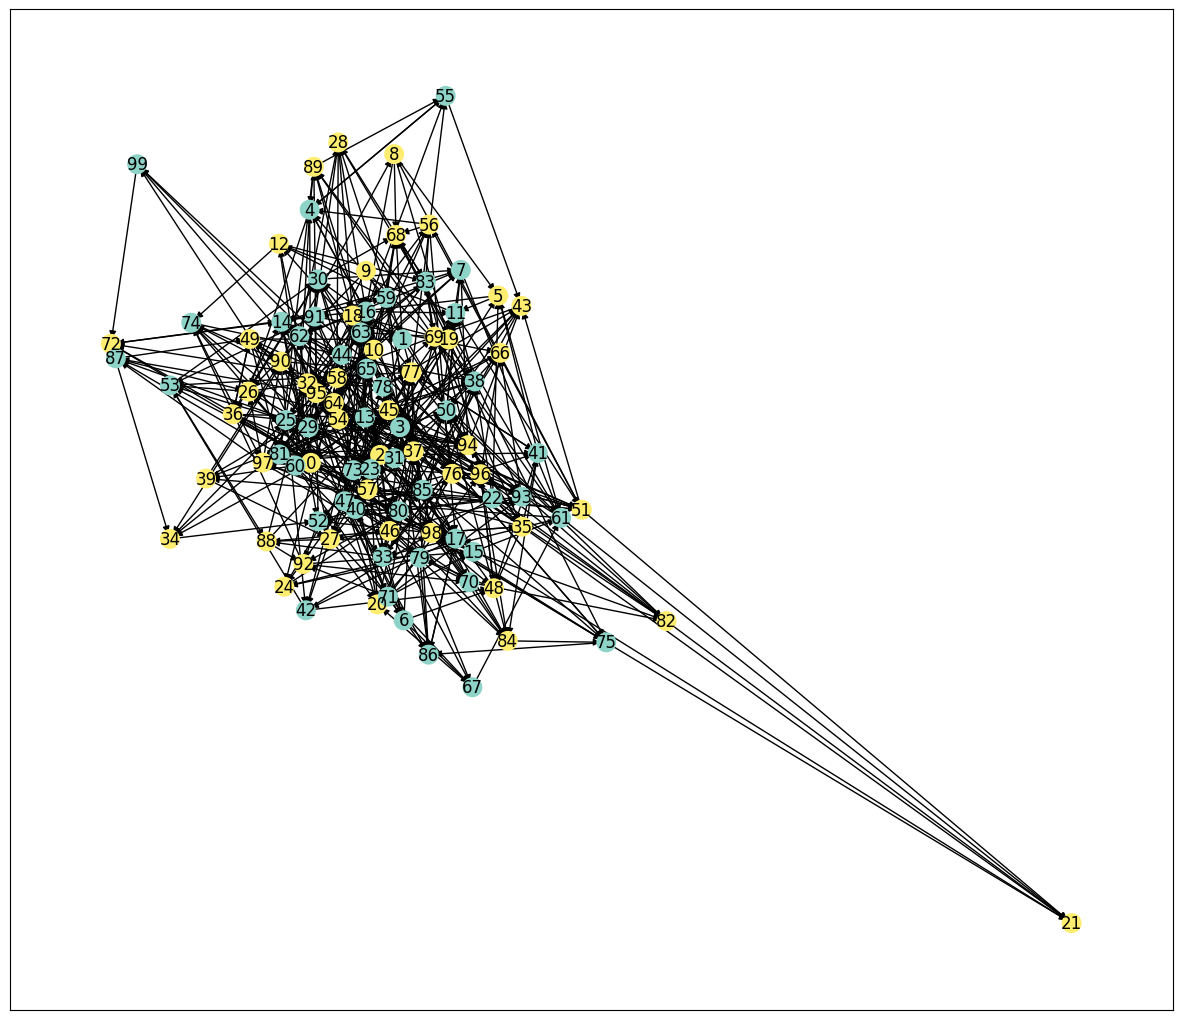

In [16]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw_networkx(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [ ]:
graph2 = graph

In [ ]:
batch = data.Batch().from_data_list([graph, graph2])

In [ ]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [ ]:
#cluster = data.ClusterData(graph, 5)

In [ ]:
#clusterloader = data.ClusterLoader(cluster)

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [ ]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

In [ ]:
for s in sampler:
    print(s)
    break

In [ ]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

### Datasets

List all the available datasets

In [ ]:
datasets.__all__

In [ ]:
name = 'Cora'
transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

In [ ]:
aids = datasets.TUDataset(root="./data", name="AIDS")

In [ ]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

In [ ]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

In [ ]:
aids.data

In [ ]:
aids[0]

In [ ]:
cora.data

In [ ]:
cora[0]

In [ ]:
cora_loader = data.DataLoader(cora)

In [ ]:
for l in cora_loader:
    print(l)
    break